## Lab 02 - Pandas and Data Visualization - 07 February, 2023
This notebook will introduce you to the basics of Pandas and Data Visualization. You will learn how to load data into a Pandas DataFrame, how to perform basic data analysis, and how to visualize data. The first part of this notebook will be an interactive tutorial, and the second part will be practice exercises for you to do! Note that the practice problems will be checked when submitted!

### Pre-requisites

In [ ]:
# In case you don't have pandas, uncomment
# the following lines and run the cell

# %pip install pandas

### Overview
In this notebook, you will be learning how to use the Pandas library by working with the `cookies.csv` file. 

#### `cookies.csv` file

The `cookies.csv` file contains information about cookies that were made from a single Rico's Bisquito's factory. There are, however, a few differences from the classes defined in homework0.

Here, this dataset shows all the cookies made from a single factory, where now the `cost_to_make` may not be the same for a single cookie because someone may have, for example, added too much flour. 

The columns are the following:

`cookie`: the name of a cookie
`ingredients`: a list of the cookie's ingredients
`calories`: the number of calories the created cookie has
`radius`: the radius of the created cookie, in cm
`cost_to_make`: the cost it took to make the created cookie, in dollars

### Reading the CSV file

First, we need to import the Pandas library. We will be using the `pd` alias for the Pandas library.

In [3]:
#TODO: import pandas and matplotlib in this cell
import pandas as pd
import matplotlib

We will now look at the `cookies.csv` file. We will use the `pd.read_csv()` function to read in the CSV file. We will store the data in a variable called `cookies`.

In [4]:
#TODO: read the cookies.csv file into a pandas dataframe
cookies = pd.read_csv('cookies.csv')

What is the DataFrame used? Well, Dataframes are a data structure that Pandas uses to store data. Dataframes are similar to tables in a database. Dataframes have rows and columns. Each row represents a single data point, and each column represents a feature of the data point.

We will then make sure we imported the data correctly by printing out the first 10 rows of the data, using the `head()` function.

In [5]:
#TODO: print the head of the dataframe
cookies_head=cookies.head(10)

### Checking data types
You can check the data types of each column using the `dtypes` attribute of the DataFrame.

In [6]:
#TODO: check the data types of the columns
cookies.dtypes

cookie           object
ingredients      object
calories          int64
radius          float64
cost_to_make    float64
dtype: object

### Cleaning the data
Now that we have the data, we need to clean it. For example, some `cost_to_make` fields of some created cookies are missing. To resolve this, we can do many things: we can replace the missing data with the mean of the column, or we can get rid of the row entirely if the `cost_to_make` field is not set. 

In [7]:
#TODO: clean the dataframe and 
# print the head again to make sure 
# the changes took effect
cookies.dropna(axis=0, how='any', inplace=True)
cookies.dtypes

cookie           object
ingredients      object
calories          int64
radius          float64
cost_to_make    float64
dtype: object

To also make sure we removed null values, we can check the number of null values in each column using the `isnull()` function.

In [8]:
#TODO: use the isnull method to make sure your data is clean
pd.isnull(cookies)

,cookie,ingredients,calories,radius,cost_to_make
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
113,False,False,False,False,False
114,False,False,False,False,False
115,False,False,False,False,False
116,False,False,False,False,False


### Parsing the data
Now that we have the data, we could parse it to get the information we want. For example, we can check what types of cookies were made by using the `unique()` function on the `cookie` column.

In [9]:
#TODO: see what cookies are in the dataset
import numpy as np
cookies.apply(pd.unique)

cookie          [laddoo lemon, nevadito, red velvet rauw, bad ...
ingredients     [["flour","lemon juice","sugar","ghee"], ["flo...
calories        [170, 224, 198, 191, 162, 204, 243, 216, 211, ...
radius          [3.102, 4.069, 3.78, 4.148, 3.241, 3.964, 3.68...
cost_to_make    [0.67, 1.04, 1.07, 1.39, 1.15, 0.84, 1.17, 1.2...
dtype: object

We can also check the number of cookies made by using the `value_counts()` function on the `cookie` column.

In [10]:
#TODO: use value_counts() to see how many 
# cookies of each type there are
cookies.apply(pd.value_counts)

,cookie,ingredients,calories,radius,cost_to_make
0.59,NaN,NaN,NaN,NaN,1.0
0.6,NaN,NaN,NaN,NaN,1.0
0.62,NaN,NaN,NaN,NaN,1.0
0.63,NaN,NaN,NaN,NaN,1.0
0.64,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...
laddoo lemon,13.0,NaN,NaN,NaN,NaN
minty miami,15.0,NaN,NaN,NaN,NaN
nevadito,15.0,NaN,NaN,NaN,NaN
orange ozuna,16.0,NaN,NaN,NaN,NaN


Or maybe we don't like how long the names of the cookies are, so we can shorten them by using the `replace()` function on the `cookie` column.

For example, let's try changing `"bad berry bunny"` to `"bbb"`.

In [11]:
#TODO: change bad berry bunny data elements to "bbb"
cookies.replace('bad berry bnunny','bbb')

,cookie,ingredients,calories,radius,cost_to_make
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.67
1,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.04
2,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.07
3,bad berry bunny,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.39
4,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.15
...,...,...,...,...,...
113,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",227,4.085,1.42
114,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.916,2.00
115,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",211,3.915,1.61
116,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",197,3.906,1.33


We may even like the original names better, but we may want to get rid of the spaces. For example, we can change `"orange ozuna"` to `"orange_ozuna"`. Here, we will use the `str.replace()` function.

In [12]:
#TODO: adjust orange ozuna as described
cookies['cookie'].str.replace('orange ozuna', 'orange_ozuna')

0         laddoo lemon
1             nevadito
2      red velvet rauw
3      bad berry bunny
4         orange_ozuna
            ...       
113          chocolate
114       laddoo lemon
115           nevadito
116    red velvet rauw
117    bad berry bunny
Name: cookie, Length: 103, dtype: object

We may even just want to keep the first word of the cookie name. For example, we can change `"orange_ozuna"` to `"orange"`.

In [13]:
#TODO: adjust all cookies so only the first word
# is used as the cookie name
cookies['cookie'].str.replace('orange ozuna', 'orange')

0         laddoo lemon
1             nevadito
2      red velvet rauw
3      bad berry bunny
4               orange
            ...       
113          chocolate
114       laddoo lemon
115           nevadito
116    red velvet rauw
117    bad berry bunny
Name: cookie, Length: 103, dtype: object

Another thing that may come to mind is that maybe getting flour could cost more money due to inflation, so we have to adjust our `cost_to_make` values, similar to how in the homework there is a `price_adjustments`. We can do this by using the `apply()` function on the `cost_to_make` column.

In [14]:
#Don't edit this method
def adjust_cost(cost):
    return cost + 0.5

#TODO: use apply() to adjust the cost_to_make column.
cookies.cost_to_make.apply(adjust_cost)

0      1.17
1      1.54
2      1.57
3      1.89
4      1.65
       ... 
113    1.92
114    2.50
115    2.11
116    1.83
117    1.86
Name: cost_to_make, Length: 103, dtype: float64

And we can do a lot more things! We will see these concepts be used in the next homework assignment, along with a couple new ones to show you how powerful Pandas is.

### More complicated operations: Grouping, Filtering, Aggregating

We may also want to group data by certain attributes. This can be done by using `groupby()`. This method takes in a column name, and groups the data by the values in that column. For example, we can group the data by the `cookie` column.

In [15]:
#TODO: group by cookie type
cookies.groupby("cookie")

We can also group by multiple columns. For example, we can group the data by the `cookie` and `ingredients` columns.

In [16]:
#TODO: group by cookie type and ingredients
cookies.groupby(["cookie", "ingredients"])

We may also want to filter the data. For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm. We can do this by indexing the DataFrame with a boolean expression.

In [17]:
#TODO: filter using the boolean expression
cookies.loc[cookies['radius'] > 4.3]


,cookie,ingredients,calories,radius,cost_to_make
22,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",219,4.346,1.18
23,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",204,4.667,1.40
39,minty miami,"[""flour"",""mint extract"",""sugar"",""butter""]",174,4.388,0.64
41,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",195,4.562,0.62
52,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",186,4.573,1.06
54,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",206,4.328,1.34
64,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",196,4.425,0.87
68,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",206,4.319,1.24
72,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",197,4.461,1.67
79,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",199,4.474,1.14


We may even want to use `groupby()` and filter idea together! For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm, and group the data by the `cookie` column.

In [18]:
#TODO: filter the data using the boolean expression
# then group by cookie column
cookies["cookie"].loc[cookies['radius'] > 4.3]

22            nevadito
23     red velvet rauw
39         minty miami
41        laddoo lemon
52        orange ozuna
54           chocolate
64     red velvet rauw
68     red velvet rauw
72           chocolate
79           chocolate
80        laddoo lemon
89     red velvet rauw
93        laddoo lemon
102    red velvet rauw
Name: cookie, dtype: object

We may also want to aggregate the data. For example, we can aggregate the data by looking at the ratio of calories to radius. We can do this by using indexing and the `apply()` function.

In [22]:
#TODO: add a column to the dataframe that is the
# calories per radius
cookies['calories per radius']=cookies.apply(lambda x: x['calories']/x['radius'], axis=1)

Or we can just get rid of this column if we find it useless. We can do this by using the `drop()` function or indexing.

In [23]:
#TODO: drop the created column
cookies.drop(['calories per radius'], axis=1)

,cookie,ingredients,calories,radius,cost_to_make
0,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.102,0.67
1,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",224,4.069,1.04
2,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",198,3.780,1.07
3,bad berry bunny,"[""flour"",""blueberries"",""sugar"",""butter""]",191,4.148,1.39
4,orange ozuna,"[""flour"",""orange juice"",""sugar"",""vegetable oil""]",162,3.241,1.15
...,...,...,...,...,...
113,chocolate,"[""flour"",""chocolate chips"",""sugar"",""butter""]",227,4.085,1.42
114,laddoo lemon,"[""flour"",""lemon juice"",""sugar"",""ghee""]",170,3.916,2.00
115,nevadito,"[""flour"",""chocolate chips"",""milk"",""vanilla ext...",211,3.915,1.61
116,red velvet rauw,"[""flour"",""cocoa powder"",""butter"",""red food col...",197,3.906,1.33


### Visualizing the data

We can also visualize the data. For example, we can visualize the data by plotting the radius of the cookies against the cost to make the cookies. We can do this by using the `plot()` function.

<AxesSubplot: xlabel='radius'>

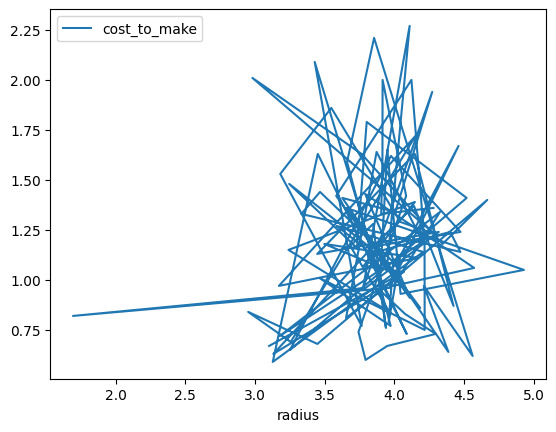

In [32]:
#TODO: plot the radius (x) versus cost to make (y)
cookies.plot(x='radius', y='cost_to_make')

We may even want to get more specific and visualize the shape of a distribution of the `laddoo lemon`'s radius by making a boxplot. We can also do this by using the `plot()` function.

<AxesSubplot: >

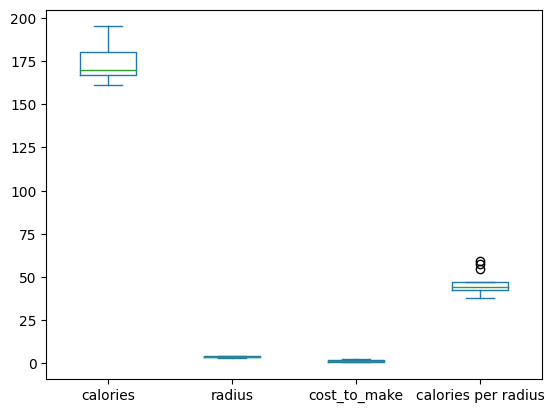

In [33]:
#TODO: add the described boxplot
cookies.loc[cookies['cookie']=='laddoo lemon'].plot.box()

Alternatively, we can create a histogram to visualize the distribution of the `laddoo lemon`'s radius. We can also do this by using the `plot()` function.

<AxesSubplot: ylabel='Frequency'>

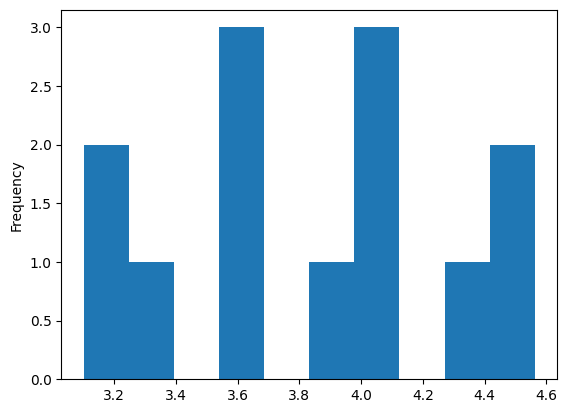

In [36]:
#TODO: add the described histogram
cookies['radius'].loc[cookies['cookie']=='laddoo lemon'].plot.hist()

Things can get more complicated too. Maybe we want to analyze the behaviors of `bad berry bunny` and `laddoo lemon`'s radius using a boxplot. But this time, let's try it using the alternative `boxplot()` function. For practice, try doing it with `plot()` too!

{'whiskers': [<matplotlib.lines.Line2D at 0x13716c3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x13716c940>,
 'boxes': [<matplotlib.lines.Line2D at 0x13716c670>,
 'medians': [<matplotlib.lines.Line2D at 0x13716dba0>,
 'fliers': [<matplotlib.lines.Line2D at 0x13716de40>,
 'means': []}

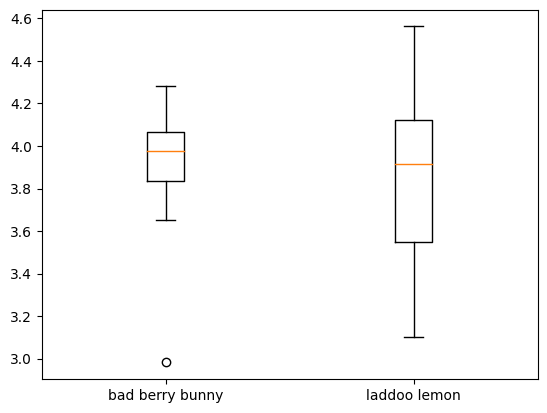

In [45]:
#TODO: analyze the two cookie's radius in a boxplot
import matplotlib.pyplot as plt
plt.boxplot([cookies.radius[cookies.cookie=='bad berry bunny'],cookies.radius[cookies.cookie=='laddoo lemon']], labels=['bad berry bunny', 'laddoo lemon'])

### Practice Problems
Now that you have learned some of Pandas' capabilities, let's try some practice problems! **This is the part that will be checked when you submit it!**

#### Problem 1
How many cookies were made? (Hint: use the `shape` attribute)

In [46]:
#Add your code here
cookies.shape[0]

103

#### Problem 2
Add a column to the DataFrame that has the value `True` if the cookie has a radius greater than 4 cm, and `False` otherwise. (Hint: use the `apply()` function)

In [49]:
#Add your code here
cookies['radius greater than 4']=cookies.apply(lambda x: x['radius']>4, axis=1)

#### Problem 3

Group the data by the `cookie` column, and find the average radius of each cookie. (Hint: use the `groupby()` and `transform()` function). Add this column to the DataFrame.

In [55]:
#Add your code here
cookies.groupby("cookie").agg('mean')

/var/folders/j2/p_sgdjnx4nn04dlj8mv5ybqh0000gn/T/ipykernel_5797/1088085048.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cookies.groupby("cookie").agg('mean')


,calories,radius,cost_to_make,calories per radius,radius greater than 4
cookie,,,,,
bad berry bunny,188.466667,3.914867,1.152667,48.436792,0.400000
chocolate,221.416667,4.062833,1.210833,55.004251,0.666667
laddoo lemon,174.384615,3.849000,1.303077,46.032538,0.461538
minty miami,186.266667,3.714467,0.938000,50.674750,0.133333
nevadito,222.400000,3.959000,1.364667,56.310399,0.466667
orange ozuna,167.250000,3.506125,1.216250,49.775514,0.187500
red velvet rauw,200.176471,4.106471,1.171765,49.211525,0.529412


#### Problem 4
Create a new DataFrame that only contains the cookies that have the ingredient `"chocolate chips"`. (Hint: use the `str.contains()` function)

In [57]:
#Add your code here
new_cookie=cookies.loc[cookies.cookie.str.contains('chocolate chips')]

#### Problem 5

Create a boxplot of `cost_to_make` for all cookies except `chocolate` using the `boxplot()` function.

{'whiskers': [<matplotlib.lines.Line2D at 0x1380cb970>,
 'caps': [<matplotlib.lines.Line2D at 0x1380cbeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1380cb6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1380dc430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1380dc670>],
 'means': []}

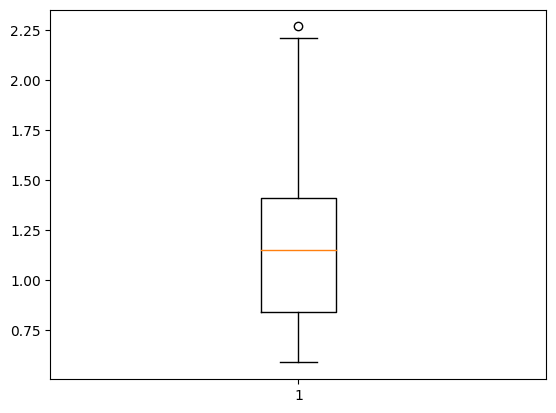

In [58]:
#Add your code here
plt.boxplot([cookies.cost_to_make[cookies.cookie!='chocolate']])


#### Problem 6

Create a histogram of the `bad berry bunny`'s calories using the `plot()` function.

<AxesSubplot: ylabel='Frequency'>

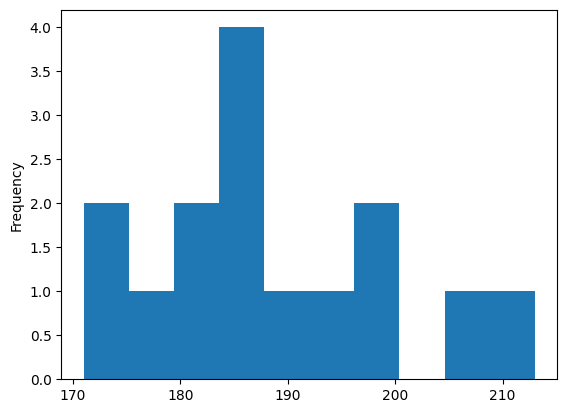

In [59]:
#Add your code here
cookies['calories'].loc[cookies['cookie']=='bad berry bunny'].plot.hist()